In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import numpy.ma as ma
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as ticker
import matplotlib.dates as dates
from mpl_toolkits.axes_grid1 import ImageGrid,make_axes_locatable,host_subplot
#from mpl_toolkits.basemap import Basemap
from datetime import datetime, timedelta
import sys
import os
import pyPIPS.utils as utils
import pyPIPS.thermolib as thermo
import pyPIPS.DSDlib as dsd
#import pyPIPS.disdrometer_module as dis
import pyPIPS.plotmodule as PIPSplot
#import pyPIPS.simulator as sim
import pyPIPS.pips_io as pipsio
import pyPIPS.PIPS as pips
import pyPIPS.parsivel_params as pp
import pyPIPS.parsivel_qc as pqc
import pyPIPS.radarmodule as radar
#from pyCRMtools.modules import plotmodule as plotmod
from pyCRMtools.modules import utils as CRMutils
from pyCRMtools.pycaps import arps_read
from pyCRMtools.pycaps import pycaps_fields
from pyCRMtools.pycaps import calvars_radar as pycaps_radar
import pandas as pd
import xarray as xr
import glob
import numpy.random as random
from scipy.stats import gamma, uniform
from scipy.special import gamma as gammafunc
from scipy import ndimage
from metpy.plots import StationPlot
from metpy.calc import wind_components
from metpy.cbook import get_test_data
from metpy.plots import StationPlot
from metpy.plots.wx_symbols import current_weather, sky_cover
from metpy.units import units
from scipy.signal import medfilt2d
%matplotlib inline


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
from natsort import natsorted
radar_name = 'KGWX'
radar_dir = '/Users/dawson29/sshfs_mounts/depot/data/Projects/VORTEXSE/obsdata/2016/NEXRAD/IOP_4B/CFRadial/modified/'
radar_paths = glob.glob(radar_dir + '/cfrad.*KGWX*')
radar_paths = natsorted(radar_paths)

In [3]:
sweeptime_start = radar._getsweeptime(radar_paths[0])
sweeptime_stop = radar._getsweeptime(radar_paths[-1])
print(sweeptime_start, sweeptime_stop)

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


2016-04-29 21:09:44 2016-04-30 00:02:01


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()


In [4]:
starttime = '20160429215000'
stoptime = '20160429220000'

radar_dict = radar.read_sweeps(radar_paths, starttime, stoptime)
print(radar_dict['radarsweeplist'])

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY_CHAR type_num is deprecated. Please port your code to use NPY_STRING instead.
  ret  = self._obj.get_value()
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/PyNIO/Nio.py:371: DeprecationWarning: The NPY

Opening file:  /Users/dawson29/sshfs_mounts/depot/data/Projects/VORTEXSE/obsdata/2016/NEXRAD/IOP_4B/CFRadial/modified/cfrad.20160429_215057.275_to_20160429_215615.942_KGWX_Surveillance_SUR.nc
Requested elevation angle  0.5
Actual elevation angle at start of sweep:  0.43945312
Time of sweep =  2016-04-29 21:55:01 
Number of gates:  1832
Radar lat,lon,alt [33.89691544] [-88.32919312] [179.]
Gatewidth  250.0
Radar beam width (degrees): 0.89
Number of azimuths in sweep  720


In [5]:
print(radar_dict['radarsweeplist'][0].info())

altitude:
	data: <ndarray of type: float64 and shape: (1,)>
	_FillValue: -9999.0
	long_name: altitude
	units: meters
	positive: up
altitude_agl:
	data: <ndarray of type: float64 and shape: (1,)>
	_FillValue: -9999.0
	long_name: altitude_above_ground_level
	units: meters
	positive: up
antenna_transition:
	data: <ndarray of type: int8 and shape: (720,)>
	_FillValue: -128
	long_name: antenna_is_in_transition_between_sweeps
	units: 
	comment: 1 if antenna is in transition, 0 otherwise
azimuth:
	data: <ndarray of type: float32 and shape: (720,)>
	_FillValue: -9999.0
	long_name: ray_azimuth_angle
	units: degrees
elevation:
	data: <ndarray of type: float32 and shape: (720,)>
	_FillValue: -9999.0
	long_name: ray_elevation_angle
	units: degrees
	positive: up
fields:
	REF:
		data: <ndarray of type: float32 and shape: (720, 1832)>
		_FillValue: -128.0
		long_name: radar_reflectivity
		units: dBZ
		standard_name: equivalent_reflectivity_factor
		sampling_ratio: 1.0
		grid_mapping: grid_mapping
		c

		data: <ndarray of type: float32 and shape: (1,)>
		_FillValue: -9999.0
		long_name: calibrated_radar_receiver_gain_h_cross_polar_channel
		units: db
		meta_group: radar_calibration
	r_calib_receiver_gain_vx:
		data: <ndarray of type: float32 and shape: (1,)>
		_FillValue: -9999.0
		long_name: calibrated_radar_receiver_gain_v_cross_polar_channel
		units: db
		meta_group: radar_calibration
	r_calib_base_dbz_1km_hc:
		data: <ndarray of type: float32 and shape: (1,)>
		_FillValue: -9999.0
		long_name: radar_reflectivity_at_1km_at_zero_snr_h_co_polar_channel
		units: dBZ
		meta_group: radar_calibration
	r_calib_base_dbz_1km_vc:
		data: <ndarray of type: float32 and shape: (1,)>
		_FillValue: -9999.0
		long_name: radar_reflectivity_at_1km_at_zero_snr_v_co_polar_channel
		units: dBZ
		meta_group: radar_calibration
	r_calib_base_dbz_1km_hx:
		data: <ndarray of type: float32 and shape: (1,)>
		_FillValue: -9999.0
		long_name: radar_reflectivity_at_1km_at_zero_snr_h_cross_polar_channel
		units

Time:  2016-04-29T21:50:57Z
Elevation:  0.48339844


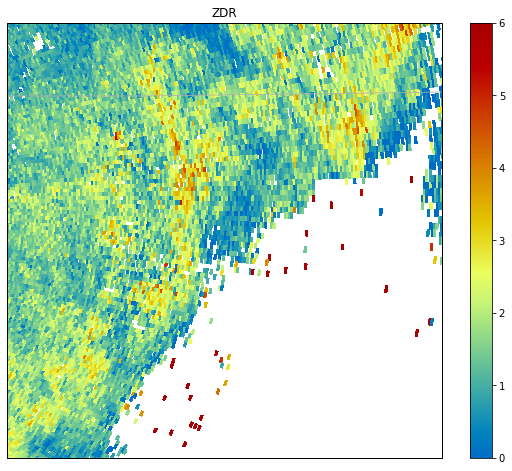

In [6]:
import pyart
import cartopy.crs as ccrs

for radar_obj in radar_dict['radarsweeplist'][:1]:
    
    rhoHV_ref_filter = pyart.correct.moment_based_gate_filter(radar_obj, rhv_field='RHO', refl_field='REF',
                                                              min_ncp=None, min_rhv=0.95,
                                                              min_refl=5., max_refl=None) 
    #print(rhoHV_filter.gate_excluded)
    radar_obj.fields['ZDR']['data'] = np.ma.masked_where(rhoHV_ref_filter.gate_excluded, radar_obj.fields['ZDR']['data'])
    xrad, yrad, zrad = radar_obj.get_gate_x_y_z(0)
    display = pyart.graph.RadarMapDisplay(radar_obj)
    fig = plt.figure(figsize=(10, 8))

    projection = ccrs.LambertConformal(central_latitude=radar_obj.latitude['data'][0],
                                       central_longitude=radar_obj.longitude['data'][0])
    
#     projection = ccrs.LambertConformal(central_latitude=PIPS_lat,
#                                        central_longitude=PIPS_lon)
    # plot dBZ
    ax = fig.add_subplot(111)
    print("Time: ", radar_obj.metadata['start_datetime'])
    print("Elevation: ", radar_obj.elevation['data'][-1])
#     display.plot_ppi_map('REF', 0, title='dBZ', cmap='pyart_HomeyerRainbow',
#                          vmin=0., vmax=60, colorbar_label='', ax=ax, resolution='10m', projection=projection,
#                          fig=fig)
    # plot D0
#     ax = fig.add_subplot(111)
#     print("Time: ", radar_obj.metadata['start_datetime'])
#     print("Elevation: ", radar_obj.elevation['data'][-1])
#     display.plot_ppi_map('D0', 0, title='D0', cmap='viridis',
#                          vmin=0., vmax=4., colorbar_label='', ax=ax, resolution='10m', projection=projection,
#                          fig=fig)
                         # min_lon=-88., max_lon=-86., min_lat=40., max_lat=41.)
    # plot ZDR
    
    display.plot_ppi_map('ZDR', 0, title='ZDR', cmap='pyart_HomeyerRainbow',
                         vmin=0, vmax=6, colorbar_label='', ax=ax, resolution='10m', projection=projection,
                         fig=fig)
    display.plot_range_ring(radar_obj.range['data'][-1]/1000., ax=ax)
    #display.set_limits(xlim=(-50, 50), ylim=(-50, 50), ax=ax)
    #display.set_limits(xlim=(-75, -55), ylim=(75, 95), ax=ax)
    #display.plot_point(PIPS_lon, PIPS_lat, 'r*', ms=20)
    display.ax.set_extent([40000, 90000, -30000, 20000], crs=projection)
    #ax.plot(PIPS_rad_loc[0]/1000., PIPS_rad_loc[1]/1000., 'r*', ms=20)
    #ax.plot(xrad[theta_index, range_index]/1000., yrad[theta_index, range_index]/1000., 'rx')
    #ax.contourf(xrad / 1000., yrad / 1000., distance)
    #ax.text(PIPS_rad_loc[0] / 1000. - 5., PIPS_rad_loc[1] / 1000., 'PIPS1A', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
    plt.show()

Time:  2016-04-29T21:50:57Z
Elevation:  0.48339844


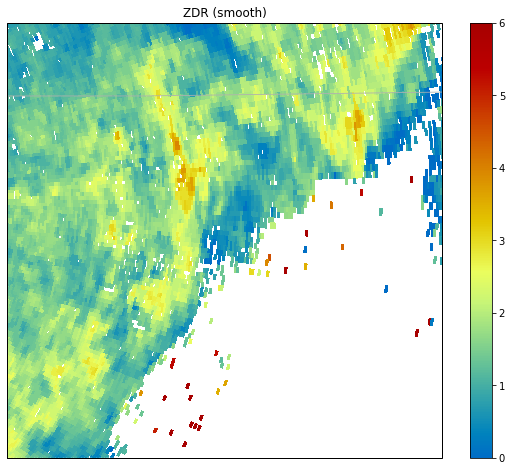

In [7]:
for radar_obj in radar_dict['radarsweeplist'][:1]:
    radar_obj.add_field_like('ZDR', 'ZDR_smooth', \
                             radar_obj.fields['ZDR']['data'].copy(), replace_existing=True)
    radar_obj.fields['ZDR_smooth']['data'] = medfilt2d(radar_obj.fields['ZDR_smooth']['data'])
    radar_obj.fields['ZDR_smooth']['data'] = np.ma.masked_array(data = radar_obj.fields['ZDR_smooth']['data'], 
                                                                mask = radar_obj.fields['ZDR']['data'].mask)
    xrad, yrad, zrad = radar_obj.get_gate_x_y_z(0)
    display = pyart.graph.RadarMapDisplay(radar_obj)
    fig = plt.figure(figsize=(10, 8))

    projection = ccrs.LambertConformal(central_latitude=radar_obj.latitude['data'][0],
                                       central_longitude=radar_obj.longitude['data'][0])
    
#     projection = ccrs.LambertConformal(central_latitude=PIPS_lat,
#                                        central_longitude=PIPS_lon)
    # plot dBZ
    ax = fig.add_subplot(111)
    print("Time: ", radar_obj.metadata['start_datetime'])
    print("Elevation: ", radar_obj.elevation['data'][-1])
#     display.plot_ppi_map('REF', 0, title='dBZ', cmap='pyart_HomeyerRainbow',
#                          vmin=0., vmax=60, colorbar_label='', ax=ax, resolution='10m', projection=projection,
#                          fig=fig)
    # plot D0
#     ax = fig.add_subplot(111)
#     print("Time: ", radar_obj.metadata['start_datetime'])
#     print("Elevation: ", radar_obj.elevation['data'][-1])
#     display.plot_ppi_map('D0', 0, title='D0', cmap='viridis',
#                          vmin=0., vmax=4., colorbar_label='', ax=ax, resolution='10m', projection=projection,
#                          fig=fig)
                         # min_lon=-88., max_lon=-86., min_lat=40., max_lat=41.)
    # plot ZDR
    
    display.plot_ppi_map('ZDR_smooth', 0, title='ZDR (smooth)', cmap='pyart_HomeyerRainbow',
                         vmin=0, vmax=6, colorbar_label='', ax=ax, resolution='10m', projection=projection,
                         fig=fig)
    display.plot_range_ring(radar_obj.range['data'][-1]/1000., ax=ax)
    #display.set_limits(xlim=(-50, 50), ylim=(-50, 50), ax=ax)
    #display.set_limits(xlim=(-75, -55), ylim=(75, 95), ax=ax)
    #display.plot_point(PIPS_lon, PIPS_lat, 'r*', ms=20)
    display.ax.set_extent([40000, 90000, -30000, 20000], crs=projection)
    #ax.plot(PIPS_rad_loc[0]/1000., PIPS_rad_loc[1]/1000., 'r*', ms=20)
    #ax.plot(xrad[theta_index, range_index]/1000., yrad[theta_index, range_index]/1000., 'rx')
    #ax.contourf(xrad / 1000., yrad / 1000., distance)
    #ax.text(PIPS_rad_loc[0] / 1000. - 5., PIPS_rad_loc[1] / 1000., 'PIPS1A', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
    plt.show()

Time:  2016-04-29T21:50:57Z
Elevation:  0.48339844


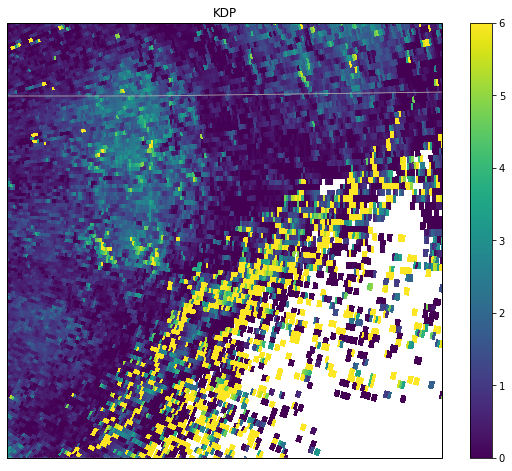

In [8]:
for radar_obj in radar_dict['radarsweeplist'][:1]:
    
    kdp, _, _ = pyart.retrieve.kdp_schneebeli(radar_obj, kdp_field='KDP', psidp_field='PHI', 
                                              band='S')
    
    radar_obj.add_field('KDP', kdp, replace_existing=True)
    
#     rhoHV_ref_filter = pyart.correct.moment_based_gate_filter(radar_obj, rhv_field='RHO', refl_field='REF',
#                                                               min_ncp=None, min_rhv=0.95,
#                                                               min_refl=5., max_refl=None) 
    #print(rhoHV_filter.gate_excluded)
#    radar_obj.fields['ZDR']['data'] = np.ma.masked_where(rhoHV_ref_filter.gate_excluded, radar_obj.fields['ZDR']['data'])
    xrad, yrad, zrad = radar_obj.get_gate_x_y_z(0)
    display = pyart.graph.RadarMapDisplay(radar_obj)
    fig = plt.figure(figsize=(10, 8))

    projection = ccrs.LambertConformal(central_latitude=radar_obj.latitude['data'][0],
                                       central_longitude=radar_obj.longitude['data'][0])
    
#     projection = ccrs.LambertConformal(central_latitude=PIPS_lat,
#                                        central_longitude=PIPS_lon)
    # plot dBZ
    ax = fig.add_subplot(111)
    print("Time: ", radar_obj.metadata['start_datetime'])
    print("Elevation: ", radar_obj.elevation['data'][-1])
#     display.plot_ppi_map('REF', 0, title='dBZ', cmap='pyart_HomeyerRainbow',
#                          vmin=0., vmax=60, colorbar_label='', ax=ax, resolution='10m', projection=projection,
#                          fig=fig)
    # plot D0
#     ax = fig.add_subplot(111)
#     print("Time: ", radar_obj.metadata['start_datetime'])
#     print("Elevation: ", radar_obj.elevation['data'][-1])
#     display.plot_ppi_map('D0', 0, title='D0', cmap='viridis',
#                          vmin=0., vmax=4., colorbar_label='', ax=ax, resolution='10m', projection=projection,
#                          fig=fig)
                         # min_lon=-88., max_lon=-86., min_lat=40., max_lat=41.)
    # plot KDP
    
    display.plot_ppi_map('KDP', 0, title='KDP',
                         vmin=0, vmax=6, colorbar_label='', ax=ax, resolution='10m', projection=projection,
                         fig=fig)
    display.plot_range_ring(radar_obj.range['data'][-1]/1000., ax=ax)
    #display.set_limits(xlim=(-50, 50), ylim=(-50, 50), ax=ax)
    #display.set_limits(xlim=(-75, -55), ylim=(75, 95), ax=ax)
    #display.plot_point(PIPS_lon, PIPS_lat, 'r*', ms=20)
    display.ax.set_extent([40000, 90000, -30000, 20000], crs=projection)
    #ax.plot(PIPS_rad_loc[0]/1000., PIPS_rad_loc[1]/1000., 'r*', ms=20)
    #ax.plot(xrad[theta_index, range_index]/1000., yrad[theta_index, range_index]/1000., 'rx')
    #ax.contourf(xrad / 1000., yrad / 1000., distance)
    #ax.text(PIPS_rad_loc[0] / 1000. - 5., PIPS_rad_loc[1] / 1000., 'PIPS1A', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
    plt.show()

In [13]:
sounding_dir = '/Users/dawson29/sshfs_mounts/depot/data/Projects/VORTEXSE/obsdata/2016/soundings/NWSRAOB/'
sounding_name = 'BMX_043016_0Z.txt'
sounding_path = os.path.join(sounding_dir, sounding_name)
sounding = pd.read_csv(sounding_path,header=[1,2],delim_whitespace=True,skiprows=[3,4])
hght = np.array(sounding["HGHT"]).squeeze()
temp = np.array(sounding["TEMP"]).squeeze()

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/pyart/retrieve/echo_class.py:359: UserWarning: Radar frequency out of range. Centroids only valid for C or X band. C band centroids will be applied
  freq_band_aux + ' band centroids will be applied')
/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/pyart/retrieve/echo_class.py:255: RuntimeWarning: invalid value encountered in less
  data[data < -0.5] = -0.5


Time:  2016-04-29T21:50:57Z
Elevation:  0.48339844


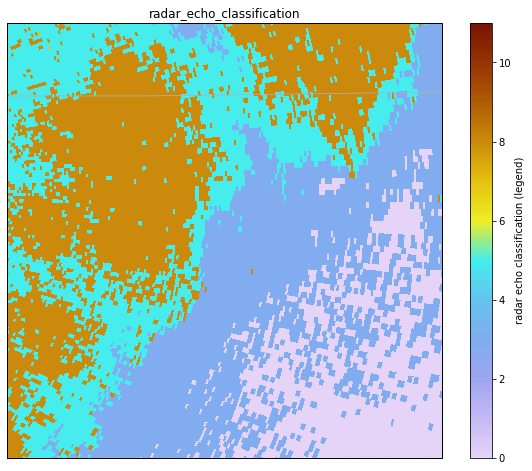

In [20]:
for radar_obj in radar_dict['radarsweeplist'][:1]:
    h_dict, t_dict = pyart.retrieve.map_profile_to_gates(temp, hght, radar_obj)
    radar_obj.add_field('sounding_temperature', t_dict, replace_existing=True)
    radar_obj.add_field('height', h_dict, replace_existing=True)
    
    hydro_class = pyart.retrieve.hydroclass_semisupervised(radar_obj, refl_field='REF', zdr_field='ZDR', 
                                                           rhv_field='RHO', kdp_field='KDP', temp_field='sounding_temperature', 
                                                           hydro_field='radar_echo_classification')
    radar_obj.add_field('radar_echo_classification', hydro_class, replace_existing=True)
#     rhoHV_ref_filter = pyart.correct.moment_based_gate_filter(radar_obj, rhv_field='RHO', refl_field='REF',
#                                                               min_ncp=None, min_rhv=0.95,
#                                                               min_refl=5., max_refl=None) 
    #print(rhoHV_filter.gate_excluded)
#    radar_obj.fields['ZDR']['data'] = np.ma.masked_where(rhoHV_ref_filter.gate_excluded, radar_obj.fields['ZDR']['data'])
    xrad, yrad, zrad = radar_obj.get_gate_x_y_z(0)
    display = pyart.graph.RadarMapDisplay(radar_obj)
    fig = plt.figure(figsize=(10, 8))

    projection = ccrs.LambertConformal(central_latitude=radar_obj.latitude['data'][0],
                                       central_longitude=radar_obj.longitude['data'][0])
    
#     projection = ccrs.LambertConformal(central_latitude=PIPS_lat,
#                                        central_longitude=PIPS_lon)
    # plot dBZ
    ax = fig.add_subplot(111)
    print("Time: ", radar_obj.metadata['start_datetime'])
    print("Elevation: ", radar_obj.elevation['data'][-1])
#     display.plot_ppi_map('REF', 0, title='dBZ', cmap='pyart_HomeyerRainbow',
#                          vmin=0., vmax=60, colorbar_label='', ax=ax, resolution='10m', projection=projection,
#                          fig=fig)
    # plot D0
#     ax = fig.add_subplot(111)
#     print("Time: ", radar_obj.metadata['start_datetime'])
#     print("Elevation: ", radar_obj.elevation['data'][-1])
#     display.plot_ppi_map('D0', 0, title='D0', cmap='viridis',
#                          vmin=0., vmax=4., colorbar_label='', ax=ax, resolution='10m', projection=projection,
#                          fig=fig)
                         # min_lon=-88., max_lon=-86., min_lat=40., max_lat=41.)
    # plot ZDR

    display.plot_ppi_map('radar_echo_classification', 0, title='radar_echo_classification', 
                         ax=ax, resolution='10m', projection=projection,
                         fig=fig)
    display.plot_range_ring(radar_obj.range['data'][-1]/1000., ax=ax)
    #display.set_limits(xlim=(-50, 50), ylim=(-50, 50), ax=ax)
    #display.set_limits(xlim=(-75, -55), ylim=(75, 95), ax=ax)
    #display.plot_point(PIPS_lon, PIPS_lat, 'r*', ms=20)
    display.ax.set_extent([40000, 90000, -30000, 20000], crs=projection)
    #ax.plot(PIPS_rad_loc[0]/1000., PIPS_rad_loc[1]/1000., 'r*', ms=20)
    #ax.plot(xrad[theta_index, range_index]/1000., yrad[theta_index, range_index]/1000., 'rx')
    #ax.contourf(xrad / 1000., yrad / 1000., distance)
    #ax.text(PIPS_rad_loc[0] / 1000. - 5., PIPS_rad_loc[1] / 1000., 'PIPS1A', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
    plt.show()